In [1]:
#4.1.1 정규방정식
#정규방정식은 선형함수에서 실손함수를 최소화하는,
#즉 예상과 실제값 사이의 오차를 줄이는 선형함수의 세타값을 직접 구하는 방식이다
import numpy as np
import matplotlib.pyplot as plt
#우선, 무작위로 만든 선형데이터셋을 만든다
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
#세타값을 구하기 위해
#numpy의 선형대수 모듈을 사용하여
#이 데이터셋의 방정식의 세타값(실손함수를 최소화하는 쪽이 아니다)을 구한다
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.00286753],
       [3.02613913]])

In [4]:
#위에서 구한 방정식의 세타값을 통해
#모델을 훈련시켜 실손함수를 최소화하는 쪽의 세타값을 예측한다
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.00286753],
       [10.05514579]])

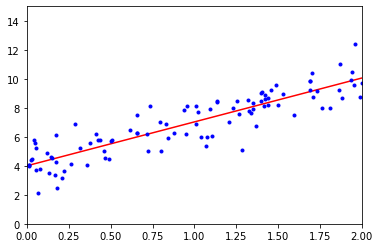

In [5]:
#다음과 같이 선형함수를 예측하는 것을 알 수 있다
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [6]:
#scikit-learn을 사용하면, 다음과 같은 방식으로 계산할 수 있다
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.00286753]), array([[3.02613913]]))

In [7]:
lin_reg.predict(X_new)

array([[ 4.00286753],
       [10.05514579]])

In [8]:
theta_best_svd,residuals,rank,s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.00286753],
       [3.02613913]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.00286753],
       [3.02613913]])

In [10]:
#4.2.1 패치 경사 하강법
#패치 경사 하강법은, 각 모델의 세타값의 변화에 따른 손실함수의 변화를 계산한다
#이를 편미분이라 하며, 이 편미분을 한데 모아 계산하는것을 gradient vector라 한다
#다음 알고리즘은, 학습률에 따른 세타값의 범위를 계산한다
#이 범위가 데이터셋의 데이터들과 가장 근접한 것이 최적해가 된다
eta = 0.1#학습률
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

In [11]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.00286753],
       [3.02613913]])

In [13]:
#4.2.2
#다음 코드는, 단순한 형태의 학습스케줄을 사용하여
#확률적구배강하법을 실장했다
#패치구배강하법은 훈련세트 전체를 대상으로 계산을 1000회 반복한 반면
#이 코드는 훈련세트를 50회만 처리해도 답을 얻을 수 있다
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients

In [14]:
theta

array([[4.00640506],
       [3.0476517 ]])

In [15]:
#SGD선형회귀는 기본적으로 이승오차손실함수를 최적화시킨 SGDRegressor를 사용한다
#다음은, 학습률 0.1부터 시작해, 디폴트 학습스케줄을 써서,정식화(정규화)하여, 한 에포크의 손실이
#0.001미만으로, 1000에포크까지 실행했다
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.00183317]), array([3.03404225]))

In [17]:
#4.3 다항식회귀
#다항식회귀는, 복잡한 데이터, 즉 비선형적 데이터를
#선형 모델에 적합하게 할 때 사용한다
#우선, 다음 2차방정식에서 비선형데이터를 생성해보자
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [18]:
#scikit-learn의 PolynomialFeatures를 사용하여
#각 특징자의 거듭제곱을 새 특징량으로서 훈련세트에 추가한다
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.01364328])

In [19]:
#그렇게 거듭제곱 특징량을 추가하면 다음과 같은 형식이 된다
X_poly[0]

array([2.01364328, 4.05475927])

In [20]:
#이 확장된 훈련데이터를 LinearRegression 모델에 적합화시켜 사용하면
#원래의 함수와 근접한 모양의 모델을 만들어낼 수 있다
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.01776162]), array([[1.16744649, 0.46238177]]))

In [21]:
#4.4 학습곡선

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth = 3, label = "val")

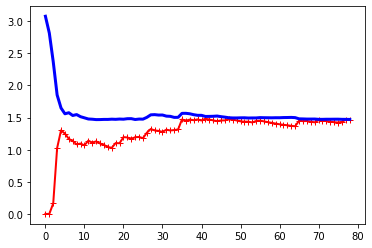

In [22]:
#다음은 단순한 선형회귀모델의 학습곡선이다

#훈련데이터에 대응하는 성능:
#훈련세트의 인스턴스는 1,2개라면, 모델은 그것들에 완전히 적합할 수 있다
#그래서, 훈련세트의 선이 0에서 시작한다
#훈련세트의 새 인스턴스가 추가되면, 데이터에 노이즈가 들어가
#곡선이 되지 않는 이유로, 점차 모델이 훈련데이터에 완전 적합할 수 없게 된다
#때문에, 훈련오차는 점차 높은 지점에서 안정된다
#새 인스턴스를 추가하는건 평균오차에 영향을 주지 않는다

#검증세트에 대응하는 성능:
#훈련세트에서 훈련한 모델은, 충분히 일반화할 수 없으므로
#첫 검증오차가 꽤 크다
#그러나, 모델이 베낀 훈련데이터의 수가 증가하면, 모델을 학습해, 검증오차가 줄어든다
#이렇게 학습곡선은 과소적합의 전형적인 예시가 된다
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

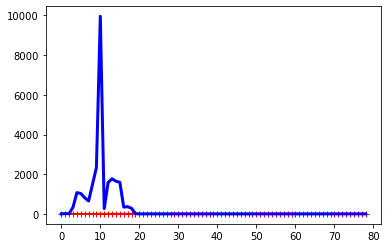

In [23]:
from sklearn.pipeline import  Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

In [24]:
#4.5.1 Ridge 회귀
#Ridge회귀는 Ridge Regression이라고 불리며
#손실함수에 정규화항을 더하는 것으로 사용된다
#정규화란, 모델에 특정한 제한을 거는 것으로, 과학습을 완화하지만
#모델의 자유도를 떨어트린다는 단점이 있다
#Ridge회귀를 통해 정규화된 것으로, 예측 그래프는 좀더 직선에 가까운 형태가 된다
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.12455732]])

In [25]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.12177582])